In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data/gps_clean.csv')
stations_paths = pd.read_csv('data/stations_paths.csv')

C:\Users\aziz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899557 entries, 0 to 1899556
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   vehicle_id      int64  
 1   line_id         int64  
 2   arrival_time    object 
 3   departure_time  object 
 4   station_id      int64  
 5   vehicle_type    float64
 6   stop_time       float64
 7   sequence_id     object 
 8   order           int64  
 9   line_label      object 
 10  travel_time     float64
 11  outlier         int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 173.9+ MB


In [4]:
stations_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [5]:
data.query('sequence_id == "105_2235"')

,vehicle_id,line_id,arrival_time,departure_time,station_id,vehicle_type,stop_time,sequence_id,order,line_label,travel_time,outlier


In [6]:
data.rename({'sequence_id':'TripID'}, axis=1, inplace=True)

In [7]:
data.head()

,vehicle_id,line_id,arrival_time,departure_time,station_id,vehicle_type,stop_time,TripID,order,line_label,travel_time,outlier
0,41,3,2020-02-17 14:37:51,2020-02-17 14:38:13,10,2.0,22.0,41.0_0,5,5,148.0,0
1,41,3,2020-02-17 14:40:19,2020-02-17 14:40:32,9,2.0,13.0,41.0_0,6,5,149.0,0
2,41,3,2020-02-17 14:42:48,2020-02-17 14:42:48,8,2.0,0.0,41.0_0,7,5,129.0,0
3,41,3,2020-02-17 14:44:57,2020-02-17 14:45:02,7,2.0,5.0,41.0_0,8,5,79.0,0
4,41,3,2020-02-17 14:46:16,2020-02-17 14:46:34,6,2.0,18.0,41.0_0,9,5,137.0,0


In [8]:
stations_paths.head()

,latitude,longitude,station_id,line_id,order,english_name,french_name,arabic_name,path_id,line_label,tag,vehicle_type
0,36.838918,10.117072,1,1,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,8,5,1,2
1,36.835840,10.117590,2,1,2,ETTADHAMEN,ETTADHAMEN,التضامن,8,5,1,2
2,36.830582,10.124005,3,1,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,8,5,1,2
3,36.829180,10.128620,4,1,4,ETTAHRIR,ETTAHRIR,التحرير,8,5,1,2
4,36.825880,10.134540,5,1,5,LES JASMINS,LES JASMINS,الياسمين,8,5,1,2


In [9]:
data.line_label.nunique()

29

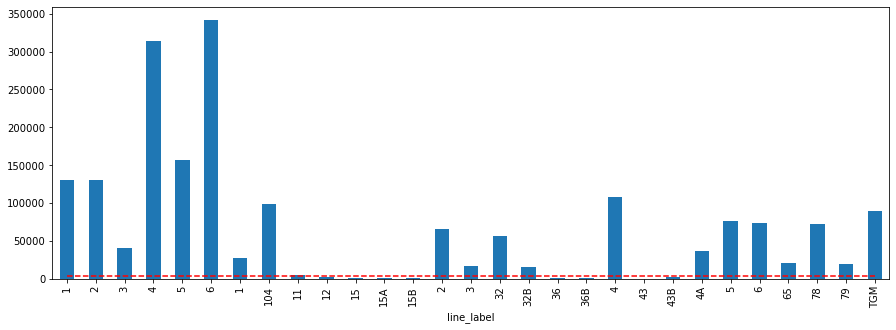

In [10]:
plt.figure(figsize=(15,5))
data.groupby('line_label').TripID.count().plot(kind = 'bar')
plt.plot(np.arange(29), np.ones(29)*3000, 'r--')
plt.show()

### Import weather Data

In [11]:
weather = pd.read_csv('../weather/weatherTunisByHour.csv')

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           6328 non-null   object 
 1   Temperature        5316 non-null   float64
 2   Precipitation      5317 non-null   float64
 3   Wind Speed         5316 non-null   float64
 4   Visibility         5304 non-null   float64
 5   Cloud Cover        5314 non-null   float64
 6   Relative Humidity  5316 non-null   float64
 7   Conditions         5317 non-null   float64
dtypes: float64(7), object(1)
memory usage: 395.6+ KB


In [13]:
weather.head()

,datetime,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2020-02-17 14,19.0,0.0,9.4,10.0,27.2,42.59,2.0
1,2020-02-17 15,19.0,0.0,7.6,10.0,27.2,39.70,2.0
2,2020-02-17 16,18.0,0.0,11.1,10.0,26.9,45.27,2.0
3,2020-02-17 17,18.0,0.0,12.9,10.0,27.0,48.39,2.0
4,2020-02-17 18,16.0,0.0,11.2,10.0,27.0,51.52,2.0


In [14]:
#transform to date time
weather['datetime'] = weather['datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H'))

In [15]:
weather.head()

,datetime,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2020-02-17 14:00:00,19.0,0.0,9.4,10.0,27.2,42.59,2.0
1,2020-02-17 15:00:00,19.0,0.0,7.6,10.0,27.2,39.70,2.0
2,2020-02-17 16:00:00,18.0,0.0,11.1,10.0,26.9,45.27,2.0
3,2020-02-17 17:00:00,18.0,0.0,12.9,10.0,27.0,48.39,2.0
4,2020-02-17 18:00:00,16.0,0.0,11.2,10.0,27.0,51.52,2.0


In [16]:
weather.Conditions.fillna(-1, inplace=True)
weather.Conditions = weather.Conditions.astype(int)

In [17]:
data['arrival_time'] = data['arrival_time'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['departure_time'] = data['departure_time'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [18]:
#date features
data['hour']  = data['arrival_time'].dt.hour
data['quarter'] = data['arrival_time'].dt.quarter
data['weekday'] = data['arrival_time'].dt.weekday
#weekday or weekend
data['service_class'] = data['arrival_time'].dt.weekday.apply(lambda x : 1 if x in [5,6] else 0)

In [19]:
weather['datetime'] = weather['datetime'].astype(str).apply(lambda x : x[:-6])
data['datetime']    = data['arrival_time'].astype(str).apply(lambda x : x[:-6])

In [20]:
weather.reset_index(drop = True)
data.reset_index(drop = True);

In [21]:
data = data.merge(weather, on ='datetime', how='left').drop_duplicates()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899557 entries, 0 to 1899556
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   vehicle_id         int64         
 1   line_id            int64         
 2   arrival_time       datetime64[ns]
 3   departure_time     datetime64[ns]
 4   station_id         int64         
 5   vehicle_type       float64       
 6   stop_time          float64       
 7   TripID             object        
 8   order              int64         
 9   line_label         object        
 10  travel_time        float64       
 11  outlier            int64         
 12  hour               int64         
 13  quarter            int64         
 14  weekday            int64         
 15  service_class      int64         
 16  datetime           object        
 17  Temperature        float64       
 18  Precipitation      float64       
 19  Wind Speed         float64       
 20  Visibility         float

In [23]:
stations_paths = pd.read_csv('data/stations_paths.csv')

In [24]:
data = data.merge(stations_paths[['station_id', 'latitude', 'longitude']].drop_duplicates(), on='station_id')

In [25]:
#add feature Distance Traveled and distance diff
#cummulative distance travelled by the bus to reach the bus stop
data = data.sort_values(['TripID','arrival_time'])
data['prev_latitude']  = data.groupby('TripID')['latitude'].shift(1)
data['prev_longitude'] = data.groupby('TripID')['longitude'].shift(1)

In [26]:
def haversine_distance(*x):
    if np.isnan(x[2]) or np.isnan(x[3]):
        return 0
    R = 6378137
    #convert to raduis
    lat1  = x[0] * np.pi/180
    long1 = x[1] * np.pi/180
    lat2  = x[2] * np.pi/180
    long2 = x[3] * np.pi/180
    #calculate haversine distance
    delta_longitude = long1 - long2
    delta_latitude = lat1 - lat2
    a = (np.sin(delta_latitude/2)**2) + np.cos(lat1)*np.cos(lat2)*(np.sin(delta_longitude/2)**2)
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    distance = R*c
    return int(distance)

In [27]:
data['distance_diff'] = data[['latitude','longitude','prev_latitude','prev_longitude']].apply(lambda x : haversine_distance(*x), axis=1)

In [28]:
data.drop(['latitude','longitude','prev_latitude','prev_longitude'], axis=1, inplace=True)

In [29]:
data['distance_traveled'] = data.groupby('TripID').distance_diff.cumsum()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899557 entries, 1551387 to 1743853
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   vehicle_id         int64         
 1   line_id            int64         
 2   arrival_time       datetime64[ns]
 3   departure_time     datetime64[ns]
 4   station_id         int64         
 5   vehicle_type       float64       
 6   stop_time          float64       
 7   TripID             object        
 8   order              int64         
 9   line_label         object        
 10  travel_time        float64       
 11  outlier            int64         
 12  hour               int64         
 13  quarter            int64         
 14  weekday            int64         
 15  service_class      int64         
 16  datetime           object        
 17  Temperature        float64       
 18  Precipitation      float64       
 19  Wind Speed         float64       
 20  Visibility        

In [31]:
data = data.sort_values(['TripID','arrival_time'])

In [32]:
data.shape

(1899557, 26)

In [33]:
data.to_csv('data/data.csv', index = False)